In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn


In [2]:
data=pd.read_csv('Insurance.csv')
data.describe(include='all') # we can see that there are no missing values also since sex, smoker and region is categorical.
#it has mentioned the number of categories whereas for numerical variables there are no categories but NaN. 
#Top is the most repeated categorical variable in a column

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


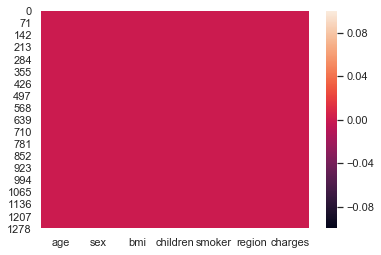

In [5]:
sns.heatmap(data.isnull(), cmap='rocket') # this again shows that there is no missing value

In [6]:
#Lets conduct EDA 

In [7]:
#first we will find the correlations and plot

In [8]:
x=data.corr()
x

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


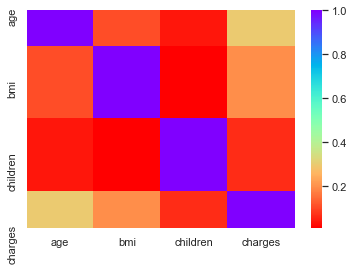

In [9]:
sns.heatmap(x, cmap='rainbow_r')

C:\Users\Sanya Jain\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Sanya Jain\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


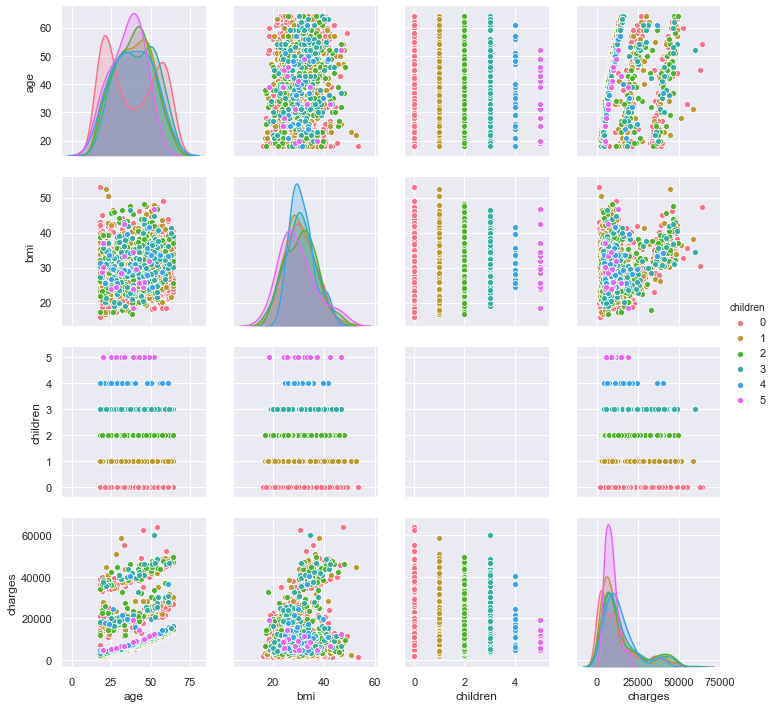

In [10]:
#sns.set_style('dark')
sns.pairplot(data, palette='husl', hue='children')

In [11]:
df=data.copy()

In [12]:
(df['age'].unique())

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [13]:
df['age'].min()

18

In [14]:
df['age'].max()

64

In [15]:
df['age'].nunique()

47

In [16]:
category = pd.cut(df.age,bins=[17,28,38,48,58,69],labels=[1,2,3,4,5])
df.insert(6,'Age Group',category)
# we create age groups that has 5 labels but not 6 as the bins and are like 17-28, 29-38 and so on...

In [17]:
df

,age,sex,bmi,children,smoker,region,Age Group,charges
0,19,female,27.900,0,yes,southwest,1,16884.92400
1,18,male,33.770,1,no,southeast,1,1725.55230
2,28,male,33.000,3,no,southeast,1,4449.46200
3,33,male,22.705,0,no,northwest,2,21984.47061
4,32,male,28.880,0,no,northwest,2,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,4,10600.54830
1334,18,female,31.920,0,no,northeast,1,2205.98080
1335,18,female,36.850,0,no,southeast,1,1629.83350
1336,21,female,25.800,0,no,southwest,1,2007.94500


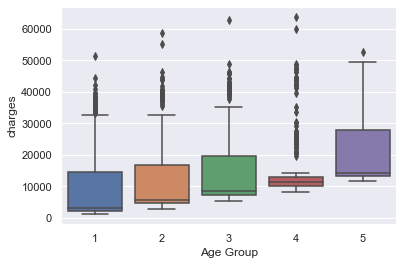

In [18]:
#let us explore each group
sns.boxplot(df['Age Group'], df['charges'])

In [19]:
# we can say that as age group increases the charges for insurance also increases but there are unusual outliers in age group 4.
# Let us remove outliers for age groups.

In [20]:
x=df.groupby(df['Age Group']).charges.mean()


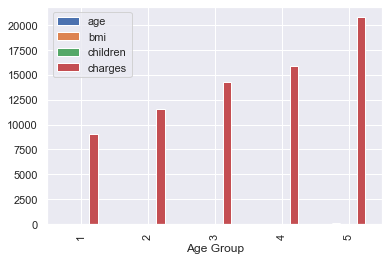

In [21]:
df.groupby(df['Age Group']).mean().plot(kind='bar')

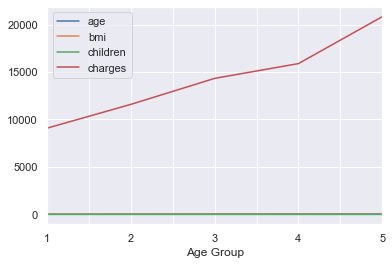

In [22]:
# or we van plot the following graphs
df.groupby(df['Age Group']).mean().plot(kind='line')
# or df.groupby(df['Age Group']).mean().plot(kind='barh ')
#df.groupby(['Sex', 'Survived'] )['Survived'].count().plot.bar(figsize=(8, 6)
# types are in this link: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

In [23]:
df.groupby(df['Age Group']).charges.count()

Age Group
1    390
2    259
3    276
4    274
5    139
Name: charges, dtype: int64

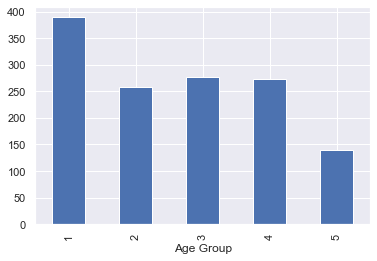

In [24]:
df.groupby(df['Age Group']).charges.count().plot(kind='bar')

In [25]:
#let us remove outliers in age 
q=df['charges'].quantile(0.99)
df_outlier=df[df['charges']<q]


In [26]:
df_outlier.describe(include='all')

,age,sex,bmi,children,smoker,region,Age Group,charges
count,1324.000000,1324,1324.000000,1324.000000,1324,1324,1324.0,1324.000000
unique,NaN,2,NaN,NaN,2,4,5.0,NaN
top,NaN,male,NaN,NaN,no,southeast,1.0,NaN
freq,NaN,667,NaN,NaN,1064,357,389.0,NaN
mean,39.089879,NaN,30.585400,1.097432,NaN,NaN,NaN,12847.275434
std,14.025792,NaN,6.067911,1.206693,NaN,NaN,NaN,11435.272603
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,NaN,1121.873900
25%,26.000000,NaN,26.220000,0.000000,NaN,NaN,NaN,4710.601913
50%,39.000000,NaN,30.275000,1.000000,NaN,NaN,NaN,9283.021300
75%,51.000000,NaN,34.443750,2.000000,NaN,NaN,NaN,16073.095438


In [27]:
df_outlier['sex']=df_outlier['sex'].map({'male':0,'female':1})
df_outlier

C:\Users\Sanya Jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,sex,bmi,children,smoker,region,Age Group,charges
0,19,1,27.900,0,yes,southwest,1,16884.92400
1,18,0,33.770,1,no,southeast,1,1725.55230
2,28,0,33.000,3,no,southeast,1,4449.46200
3,33,0,22.705,0,no,northwest,2,21984.47061
4,32,0,28.880,0,no,northwest,2,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,4,10600.54830
1334,18,1,31.920,0,no,northeast,1,2205.98080
1335,18,1,36.850,0,no,southeast,1,1629.83350
1336,21,1,25.800,0,no,southwest,1,2007.94500


In [28]:
df_outlier['smoker']=df_outlier['smoker'].map({'yes':0,'no':1})
df_outlier

C:\Users\Sanya Jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,sex,bmi,children,smoker,region,Age Group,charges
0,19,1,27.900,0,0,southwest,1,16884.92400
1,18,0,33.770,1,1,southeast,1,1725.55230
2,28,0,33.000,3,1,southeast,1,4449.46200
3,33,0,22.705,0,1,northwest,2,21984.47061
4,32,0,28.880,0,1,northwest,2,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,northwest,4,10600.54830
1334,18,1,31.920,0,1,northeast,1,2205.98080
1335,18,1,36.850,0,1,southeast,1,1629.83350
1336,21,1,25.800,0,1,southwest,1,2007.94500


In [29]:
df_mapped=df_outlier.copy()

In [30]:
Region=pd.get_dummies(df_mapped['region'], drop_first=True)
Region


,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [31]:
# Now we add the dummy variable column using concat 
df_mapped=pd.concat([df_mapped, Region], axis=1 )
df_mapped

,age,sex,bmi,children,smoker,region,Age Group,charges,northwest,southeast,southwest
0,19,1,27.900,0,0,southwest,1,16884.92400,0,0,1
1,18,0,33.770,1,1,southeast,1,1725.55230,0,1,0
2,28,0,33.000,3,1,southeast,1,4449.46200,0,1,0
3,33,0,22.705,0,1,northwest,2,21984.47061,1,0,0
4,32,0,28.880,0,1,northwest,2,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,northwest,4,10600.54830,1,0,0
1334,18,1,31.920,0,1,northeast,1,2205.98080,0,0,0
1335,18,1,36.850,0,1,southeast,1,1629.83350,0,1,0
1336,21,1,25.800,0,1,southwest,1,2007.94500,0,0,1


In [32]:
# now we drop the region column since the dummy variable column is already created
df_mapped.drop('region', axis=1, inplace=True)
df_mapped

,age,sex,bmi,children,smoker,Age Group,charges,northwest,southeast,southwest
0,19,1,27.900,0,0,1,16884.92400,0,0,1
1,18,0,33.770,1,1,1,1725.55230,0,1,0
2,28,0,33.000,3,1,1,4449.46200,0,1,0
3,33,0,22.705,0,1,2,21984.47061,1,0,0
4,32,0,28.880,0,1,2,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,4,10600.54830,1,0,0
1334,18,1,31.920,0,1,1,2205.98080,0,0,0
1335,18,1,36.850,0,1,1,1629.83350,0,1,0
1336,21,1,25.800,0,1,1,2007.94500,0,0,1


In [33]:
df_bins=df_mapped.copy()

In [34]:

bmi=pd.cut(df_bins.bmi, bins=[0,30,54], labels=[0,1])
df_bins.insert(2, 'Obesity', bmi)

In [35]:
df_bins

,age,sex,Obesity,bmi,children,smoker,Age Group,charges,northwest,southeast,southwest
0,19,1,0,27.900,0,0,1,16884.92400,0,0,1
1,18,0,1,33.770,1,1,1,1725.55230,0,1,0
2,28,0,1,33.000,3,1,1,4449.46200,0,1,0
3,33,0,0,22.705,0,1,2,21984.47061,1,0,0
4,32,0,0,28.880,0,1,2,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,1,30.970,3,1,4,10600.54830,1,0,0
1334,18,1,1,31.920,0,1,1,2205.98080,0,0,0
1335,18,1,1,36.850,0,1,1,1629.83350,0,1,0
1336,21,1,0,25.800,0,1,1,2007.94500,0,0,1


In [36]:
# Now we will reorder the columns, remmeber that renaming is done differently than reordering
df_bins.columns.values

array(['age', 'sex', 'Obesity', 'bmi', 'children', 'smoker', 'Age Group',
       'charges', 'northwest', 'southeast', 'southwest'], dtype=object)

In [37]:
columns_names_reordered=['age', 'sex', 'Obesity', 'bmi', 'children', 'smoker', 'Age Group',
       'northwest', 'southeast', 'southwest',  'charges']

In [38]:
df_bins=df_bins[columns_names_reordered]
df_bins

,age,sex,Obesity,bmi,children,smoker,Age Group,northwest,southeast,southwest,charges
0,19,1,0,27.900,0,0,1,0,0,1,16884.92400
1,18,0,1,33.770,1,1,1,0,1,0,1725.55230
2,28,0,1,33.000,3,1,1,0,1,0,4449.46200
3,33,0,0,22.705,0,1,2,1,0,0,21984.47061
4,32,0,0,28.880,0,1,2,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,1,30.970,3,1,4,1,0,0,10600.54830
1334,18,1,1,31.920,0,1,1,0,0,0,2205.98080
1335,18,1,1,36.850,0,1,1,0,1,0,1629.83350
1336,21,1,0,25.800,0,1,1,0,0,1,2007.94500


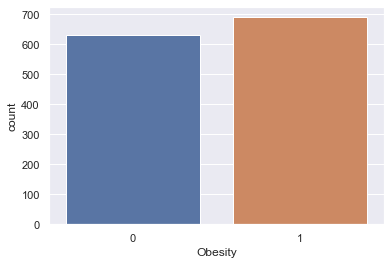

In [39]:
sns.countplot(df_bins['Obesity'])

In [40]:
# Now let us analyse obesity
df_bins[['Obesity', 'charges']].groupby(df_bins['Obesity'], as_index=False).mean()

,charges
0,10719.386942
1,14796.556789


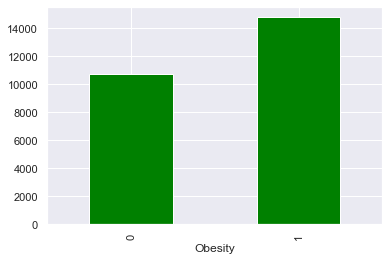

In [41]:
df_bins.groupby(df_bins['Obesity']).charges.mean().plot(kind='bar', color='green')
# we can conclude that obese people have to pay more insurance preium than non obese

In [42]:
df_bins.drop('Obesity', axis=1, inplace=True)

C:\Users\Sanya Jain\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [43]:
df_bins.drop('Age Group', axis=1, inplace=True)


In [44]:
df_bins

,age,sex,bmi,children,smoker,northwest,southeast,southwest,charges
0,19,1,27.900,0,0,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1,0,1725.55230
2,28,0,33.000,3,1,0,1,0,4449.46200
3,33,0,22.705,0,1,1,0,0,21984.47061
4,32,0,28.880,0,1,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,1,0,0,10600.54830
1334,18,1,31.920,0,1,0,0,0,2205.98080
1335,18,1,36.850,0,1,0,1,0,1629.83350
1336,21,1,25.800,0,1,0,0,1,2007.94500


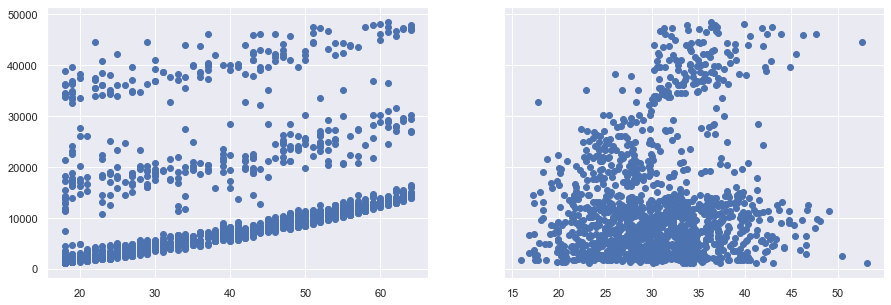

In [80]:
f, (ax1, ax2)=plt.subplots(1,2, sharey=True, figsize=(15,5))

ax1.scatter(df_bins['age'], df_bins['charges'])

ax2.scatter(df_bins['bmi'], df_bins['charges'])
 
#seeing these plots we cannot establish a linear pattern and can also say that they are not normally distributed so we will
# log transform the data

In [46]:
df_log=df_bins.copy()

In [47]:
log_charges=np.log(df_log['charges'])
df_log['log_charges']=log_charges
df_log

,age,sex,bmi,children,smoker,northwest,southeast,southwest,charges,log_charges
0,19,1,27.900,0,0,0,0,1,16884.92400,9.734176
1,18,0,33.770,1,1,0,1,0,1725.55230,7.453302
2,28,0,33.000,3,1,0,1,0,4449.46200,8.400538
3,33,0,22.705,0,1,1,0,0,21984.47061,9.998092
4,32,0,28.880,0,1,1,0,0,3866.85520,8.260197
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,1,0,0,10600.54830,9.268661
1334,18,1,31.920,0,1,0,0,0,2205.98080,7.698927
1335,18,1,36.850,0,1,0,1,0,1629.83350,7.396233
1336,21,1,25.800,0,1,0,0,1,2007.94500,7.604867


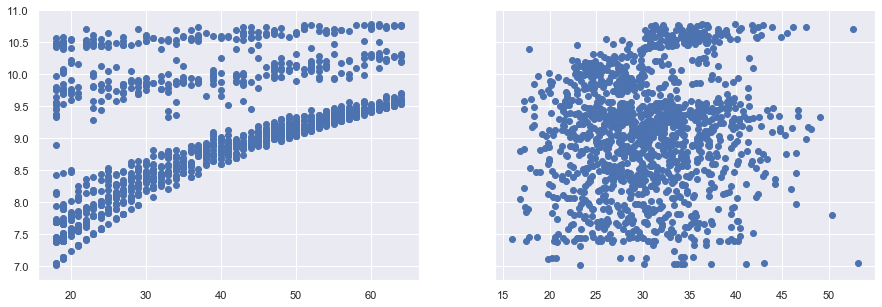

In [48]:
# now lets plot log_charges and age and bmi
f,(ax1, ax2)=plt.subplots(1,2, sharey=True, figsize=(15,5))
ax1.scatter(df_log['age'], df_log['log_charges'])
ax2.scatter(df_log['bmi'], df_log['log_charges'])

In [49]:
df_log.drop('charges', axis=1, inplace=True)
df_log

,age,sex,bmi,children,smoker,northwest,southeast,southwest,log_charges
0,19,1,27.900,0,0,0,0,1,9.734176
1,18,0,33.770,1,1,0,1,0,7.453302
2,28,0,33.000,3,1,0,1,0,8.400538
3,33,0,22.705,0,1,1,0,0,9.998092
4,32,0,28.880,0,1,1,0,0,8.260197
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,1,0,0,9.268661
1334,18,1,31.920,0,1,0,0,0,7.698927
1335,18,1,36.850,0,1,0,1,0,7.396233
1336,21,1,25.800,0,1,0,0,1,7.604867


In [50]:
# now we need to define inputs and targets
targets=df_log['log_charges']
inputs=df_log.iloc[:, 0:8]


In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
charges=StandardScaler()

In [53]:
charges.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [54]:
scaled_data=charges.transform(inputs)

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
train_test_split(scaled_data, targets)

[array([[ 0.99212774,  1.00758161, -0.4097521 , ..., -0.56804694,
         -0.60760435,  1.76402983],
        [-0.93362468, -0.99247544, -0.2366453 , ..., -0.56804694,
          1.64580785, -0.56688384],
        [ 1.0634519 , -0.99247544, -0.22840212, ..., -0.56804694,
         -0.60760435,  1.76402983],
        ...,
        [ 0.2788861 ,  1.00758161,  0.65856419, ...,  1.76041791,
         -0.60760435, -0.56688384],
        [-0.79097636,  1.00758161, -2.19192789, ..., -0.56804694,
         -0.60760435, -0.56688384],
        [-1.14759718,  1.00758161,  0.70555032, ..., -0.56804694,
         -0.60760435, -0.56688384]]),
 array([[-1.14759718, -0.99247544,  0.34862057, ..., -0.56804694,
         -0.60760435,  1.76402983],
        [ 0.56418275,  1.00758161, -0.48476505, ...,  1.76041791,
         -0.60760435, -0.56688384],
        [ 0.77815525, -0.99247544,  0.28267512, ..., -0.56804694,
         -0.60760435,  1.76402983],
        ...,
        [ 1.42007272,  1.00758161, -0.50867028, ..., -

In [57]:
x_train, x_test, y_train, y_test=train_test_split(scaled_data, targets, train_size=.80, random_state=1)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
reg=LinearRegression()

In [60]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
y_hat=reg.predict(x_train)

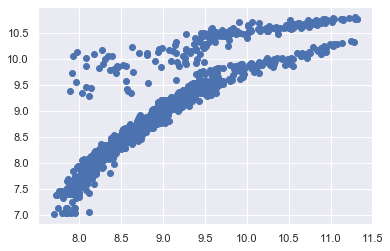

In [62]:
plt.scatter(y_hat, y_train)

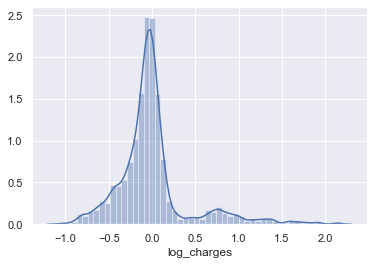

In [63]:
sns.distplot(y_train-y_hat)  #there may be overestimation of predicted value than actual

In [64]:
reg.score(x_train,y_train) #model explains 78% of variability

0.7775663290388433

In [65]:
x=reg.intercept_


In [66]:
y=reg.coef_

In [67]:
feature=inputs.columns.values

In [68]:
table=pd.DataFrame(columns=['Features'], data=feature)
table['Coefficients']=y
table
# we can do the same with this line
#table2=pd.DataFrame(inputs.columns.values, columns=['Features'])
#table2['Coefficients']=y
#table2 or else if there is aproplem we can transpose ndarrays using np.transpose
#or table.T works as transpose

,Features,Coefficients
0,age,0.501205
1,sex,0.026610
2,bmi,0.085120
3,children,0.125920
4,smoker,-0.614019
5,northwest,-0.036589
6,southeast,-0.070599
7,southwest,-0.048889


In [69]:
#shifting all the indices by 1
table.index=table.index+1
table

,Features,Coefficients
1,age,0.501205
2,sex,0.026610
3,bmi,0.085120
4,children,0.125920
5,smoker,-0.614019
6,northwest,-0.036589
7,southeast,-0.070599
8,southwest,-0.048889


In [70]:
table.loc[0]=['Intercept', x]
table
#Since the row 0 is coming at the borrom we would want to arrange it in ascending order
table.sort_index()

,Features,Coefficients
0,Intercept,9.072213
1,age,0.501205
2,sex,0.026610
3,bmi,0.085120
4,children,0.125920
5,smoker,-0.614019
6,northwest,-0.036589
7,southeast,-0.070599
8,southwest,-0.048889


In [71]:
#Now we would want to find the log odds
table['Odds ratio']=np.exp(table['Coefficients'])
table

,Features,Coefficients,Odds ratio
1,age,0.501205,1.650709
2,sex,0.026610,1.026967
3,bmi,0.085120,1.088847
4,children,0.125920,1.134192
5,smoker,-0.614019,0.541171
6,northwest,-0.036589,0.964073
7,southeast,-0.070599,0.931836
8,southwest,-0.048889,0.952287
0,Intercept,9.072213,8709.878774


In [72]:
#Now we would want to sort the coefficients with respect to weight
table.sort_values(['Odds ratio'], ascending=False)

,Features,Coefficients,Odds ratio
0,Intercept,9.072213,8709.878774
1,age,0.501205,1.650709
4,children,0.125920,1.134192
3,bmi,0.085120,1.088847
2,sex,0.026610,1.026967
6,northwest,-0.036589,0.964073
8,southwest,-0.048889,0.952287
7,southeast,-0.070599,0.931836
5,smoker,-0.614019,0.541171


In [73]:
z=reg.predict(x_test)

In [74]:
np.sum(z==y_test)

0

In [75]:
reg.score(x_test,y_test)

0.6908858873741293